# Heart Failure Prediction Dataset : VERSION_2

**Objectif** : Identifier une possible défaillance cardiaque chez l'individu 

### Packages necessaires & dataset 

In [1]:
import sys 
#sys.path.insert(0, "C://Users/asnga/KatalyseGits/mypackage")
sys.path.append("../")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline
from mypackage.functions import *
from mypackage.classifcationmodels import *
from mypackage.encoding_functions import *
from mypackage.opersfunctions import *

# from sklearn.impute import SimpleImputer
# from sklearn.datasets import make_classification, load_iris
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder,RobustScaler
# from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree

In [2]:
#Data retrieving  
HeartD_df = pd.read_csv("heart.csv")

In [3]:
#df : deep copy of initial dataset
df = HeartD_df.copy()

### Analyse de forme:

In [4]:
# # # to show all the rows of the dataset
pd.set_option('display.max_row',df.shape[0])

# # # to show all the columns of the dataset
pd.set_option('display.max_columns',df.shape[1])

In [5]:
# #First row of the dataset 
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


- **Analyse Target :**
 
 variable target : **HeartDisease**

- **Rows & columns :** 

In [6]:
dshape(df)

This dataset contains:
--> 918 lignes
--> 12 colones
--> RangeIndex(start=0, stop=918, step=1)


- **Vairables types :** 

(  Numerics_cols Categorials_cols
 0           Age              Sex
 1     RestingBP    ChestPainType
 2   Cholesterol       RestingECG
 3     FastingBS   ExerciseAngina
 4         MaxHR         ST_Slope
 5       Oldpeak              NaN
 6  HeartDisease              NaN,
 <AxesSubplot: >)

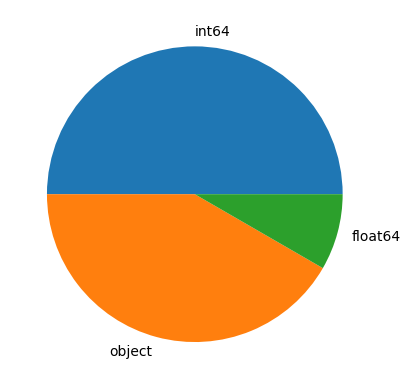

In [7]:
data_types(df)

- **Some statistics on numerics variables :** 

In [8]:
stats(df)


,mean,25%,50%,75%,count
Age,53.510893,47.00,54.0,60.0,918.0
RestingBP,132.396514,120.00,130.0,140.0,918.0
Cholesterol,198.799564,173.25,223.0,267.0,918.0
FastingBS,0.233115,0.00,0.0,0.0,918.0
MaxHR,136.809368,120.00,138.0,156.0,918.0
Oldpeak,0.887364,0.00,0.6,1.5,918.0
HeartDisease,0.553377,0.00,1.0,1.0,918.0


In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,918.0,NaN,NaN,NaN,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
Sex,918,2,M,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,918.0,NaN,NaN,NaN,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,NaN,NaN,NaN,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,NaN,NaN,NaN,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
RestingECG,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,918.0,NaN,NaN,NaN,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
ExerciseAngina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,918.0,NaN,NaN,NaN,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2


- **Analyse of missing values :**

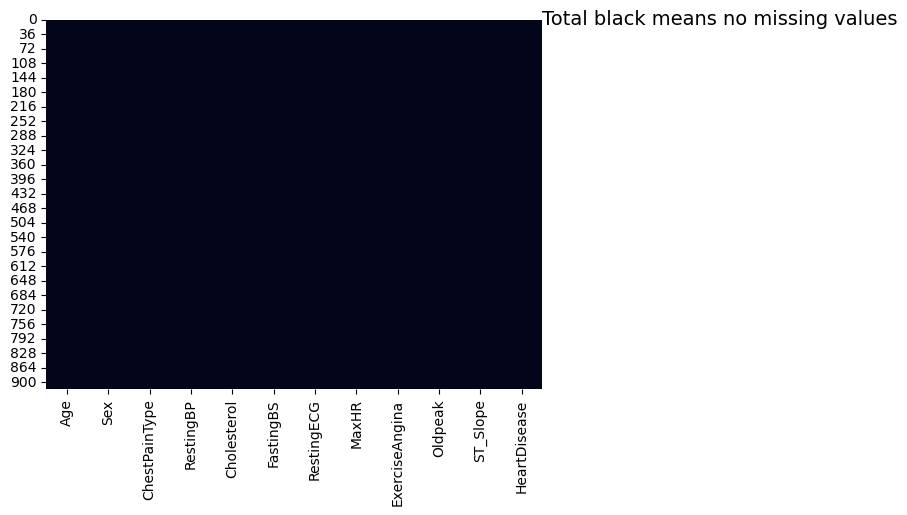

In [10]:
map_nan(df)

In [11]:
percentage_mv(df)

Percentage of missing values by columns


Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64


### Analyse de fond (Préparation des données) 




- **Visualisation de la target :**



In [12]:
info_target(df,"HeartDisease")

Target values & percentage by categorie

   HeartDisease
1           508
0           410


,HeartDisease
1,0.553377
0,0.446623


- **Analyse des Variables Continues :**

In [13]:
#plot_num(df)

- **Analyse des Variables Discrètes :**

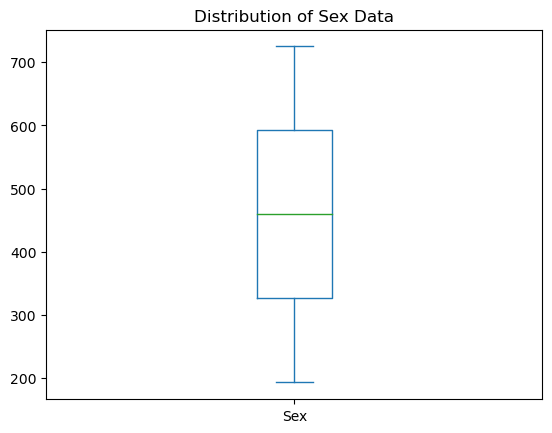

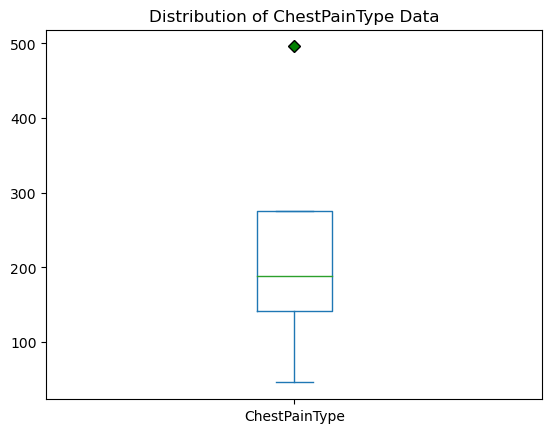

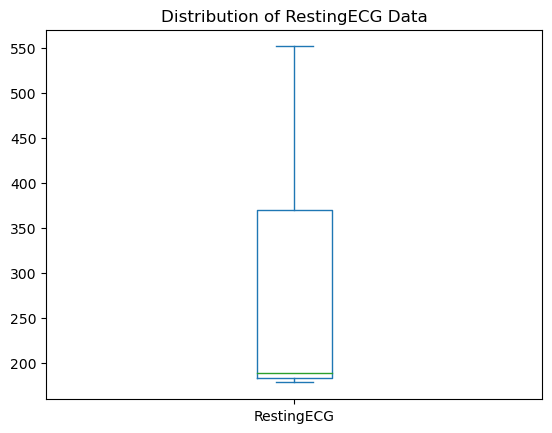

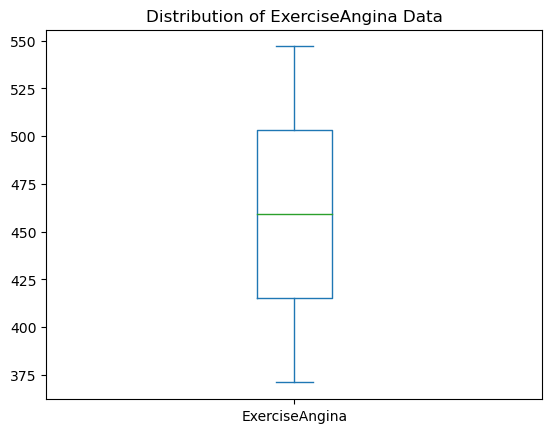

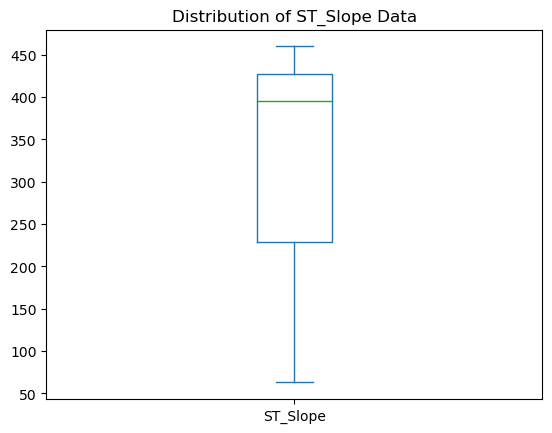

In [14]:
plot_cat(df)

In [15]:
#ditrib_df(df)

- **Signification des variables :**



- **Relation Variables / Target :**
    - Création de sous-ensembles: heartdisease(1) & notheartdisease(1) 
   
   

In [16]:
# target_yes = df[df["HeartDisease"] == 1]  
# target_no = df[df["HeartDisease"] == 0]

In [17]:
#df['Cholesterol_measure'] =  df.apply(lambda x: np.where(x["Cholesterol"] > 0, 1, 0) , axis=1)

   - Analyse Target / concat ( cat+num)
    - Analyse Target / Variables categorielles 
    - Analyse Target / Variables numeriques  
    

### Conclusions de base:
       Ce jeu de données ne possedent pas de valeurs manquantes, avec une majorité de valeurs hommes que femmes. 
    

### **Preprocessing**

**Preparing dataset into train & test samples**

In [18]:
#extraction de la cible(y) et des variables explicatives(X)
y=df["HeartDisease"]
X=df.drop(["HeartDisease"],axis=1)

In [19]:
#séparation des données : données d'entrainement & données de test 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=0)

### _Première itération_ : Encodages de features 

**Encodage _1**
        . Traitement des variables catégorielles : OneHotEncoder()
        . Traitement des variables numériques : RobustSclaer()

In [20]:
# Encoding training Dataset  
X1_train = pd.concat([nums_values(X_train,X_train, RobustScaler()),
                      encode_cat_values(X_train, X_train, OneHotEncoder())],axis=1)

In [21]:
# Encoding test Dataset 
X1_test = pd.concat([nums_values(X_train,X_test, RobustScaler()),
                      encode_cat_values(X_train, X_test, OneHotEncoder())],axis=1)

**Modelisation_1** 

In [22]:
clas_ml(X1_train, y_train, X1_test, y_test)

C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted t

'DONE!!!'

In [23]:
eval_report(y_test)

 MODELS EVALUATION REPORT
........................


,Accuracy,Precision,Sensitivity_recall,Specificity,F1_score
Nearest Neighbors,0.855072,0.863905,0.895706,0.796460,0.879518
Linear SVM,0.829710,0.853659,0.858896,0.787611,0.856269
RBF SVM,0.735507,0.695652,0.981595,0.380531,0.814249
Gaussian Process,0.862319,0.865497,0.907975,0.796460,0.886228
Decision Tree,0.836957,0.868750,0.852761,0.814159,0.860681
Random Forest,0.840580,0.856287,0.877301,0.787611,0.866667
AdaBoost,0.862319,0.878788,0.889571,0.823009,0.884146
Naive Bayes,0.855072,0.868263,0.889571,0.805310,0.878788


 CONFUSION MATRIX BY MODEL
........................


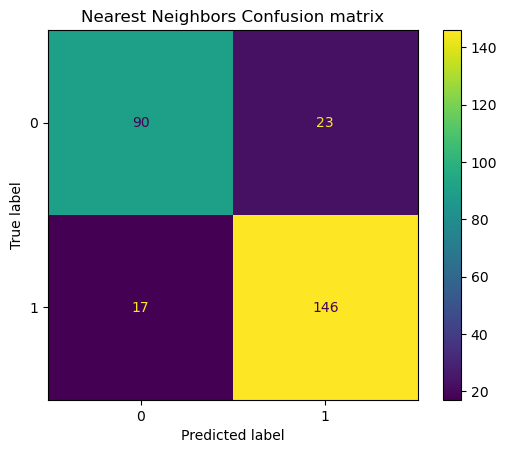

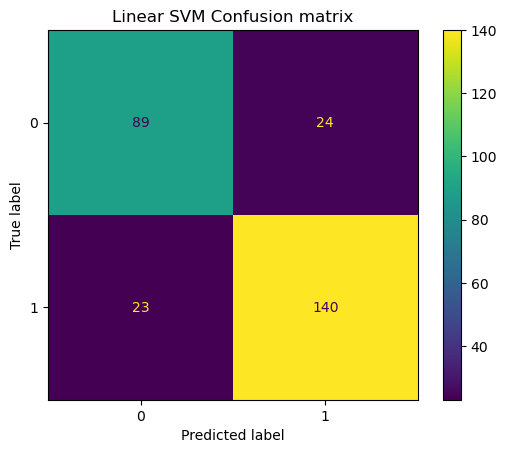

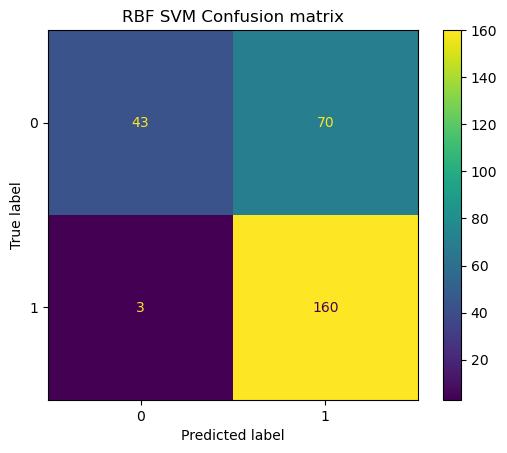

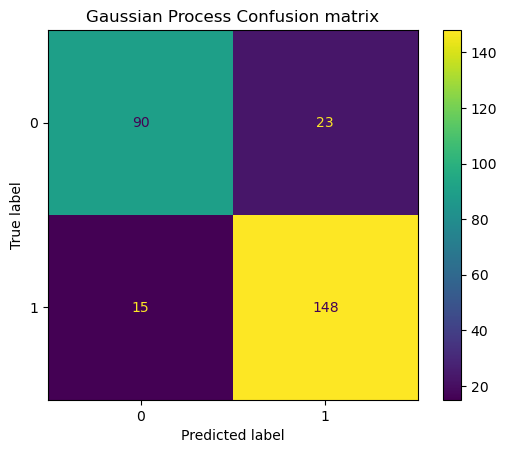

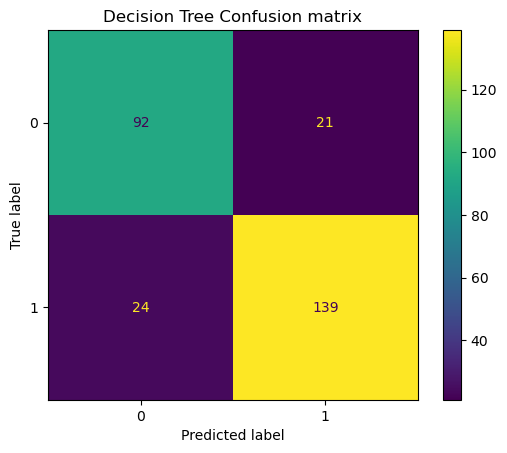

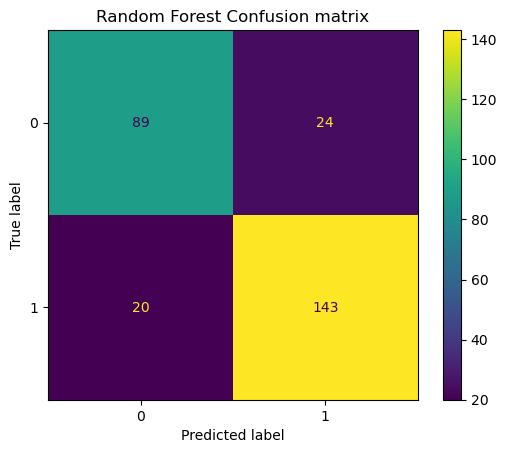

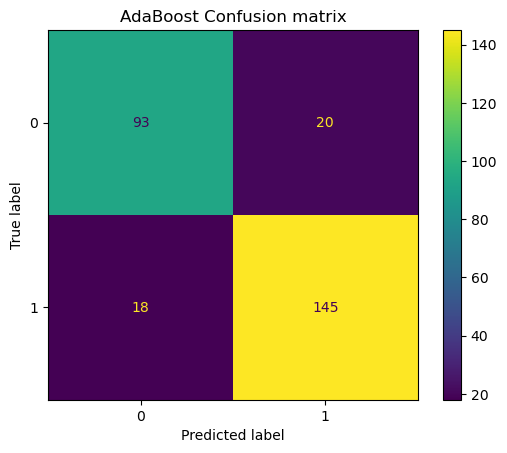

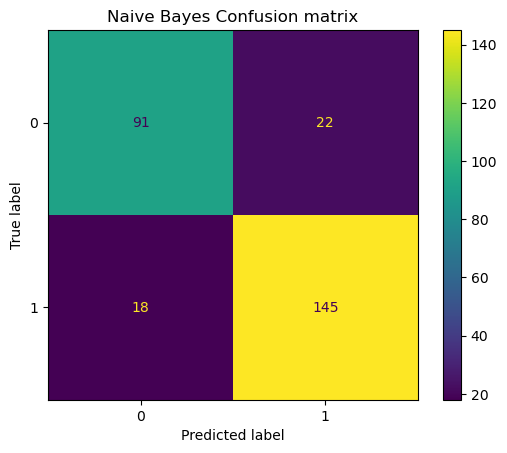

In [24]:
conf_matrix(y_test)

**Encodage _2**
        . Traitement des variables catégorielles : OneHotEncoder()
        . Traitement des variables numériques : StandardSclaer()

In [25]:
# Encoding training Dataset  
X2_train = pd.concat([nums_values(X_train,X_train, StandardScaler()),
                      encode_cat_values(X_train, X_train, OneHotEncoder())],axis=1)

In [26]:
# Encoding test Dataset 
X2_test = pd.concat([nums_values(X_train,X_test, StandardScaler()),
                      encode_cat_values(X_train, X_test, OneHotEncoder())],axis=1)

**Modelisation_2** 

In [27]:
clas_ml(X2_train, y_train, X2_test, y_test)

C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted t

'DONE!!!'

In [28]:
eval_report(y_test)

 MODELS EVALUATION REPORT
........................


,Accuracy,Precision,Sensitivity_recall,Specificity,F1_score
Nearest Neighbors,0.858696,0.882716,0.877301,0.831858,0.880000
Linear SVM,0.840580,0.860606,0.871166,0.796460,0.865854
RBF SVM,0.699275,0.666667,0.981595,0.292035,0.794045
Gaussian Process,0.855072,0.863905,0.895706,0.796460,0.879518
Decision Tree,0.840580,0.869565,0.858896,0.814159,0.864198
Random Forest,0.855072,0.863905,0.895706,0.796460,0.879518
AdaBoost,0.862319,0.878788,0.889571,0.823009,0.884146
Naive Bayes,0.855072,0.868263,0.889571,0.805310,0.878788


 CONFUSION MATRIX BY MODEL
........................


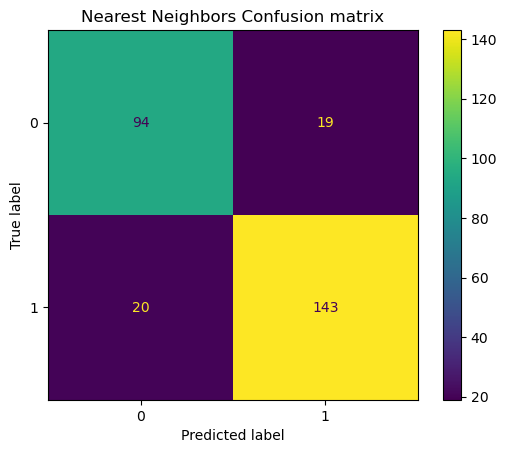

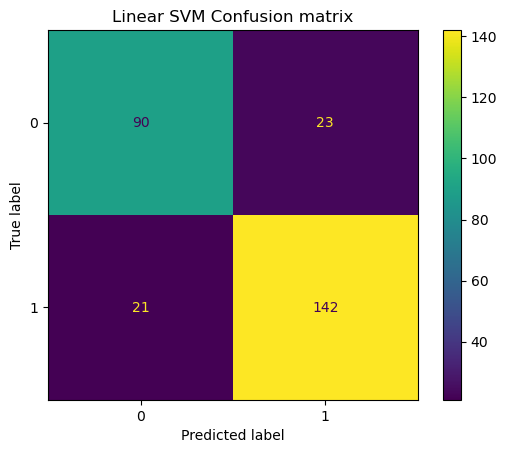

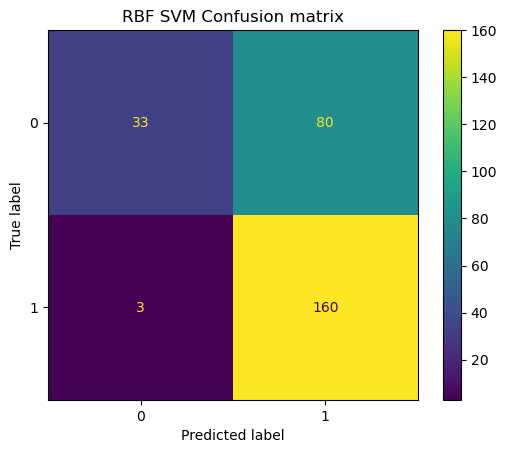

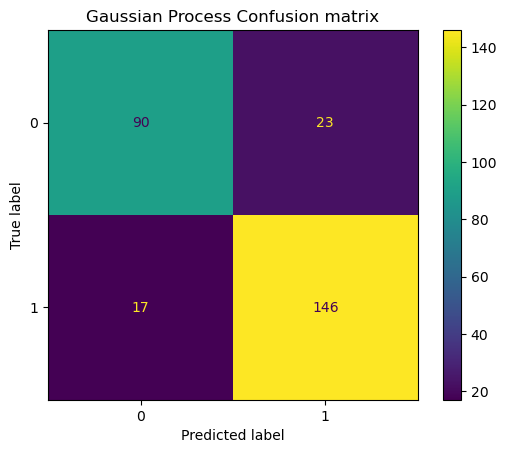

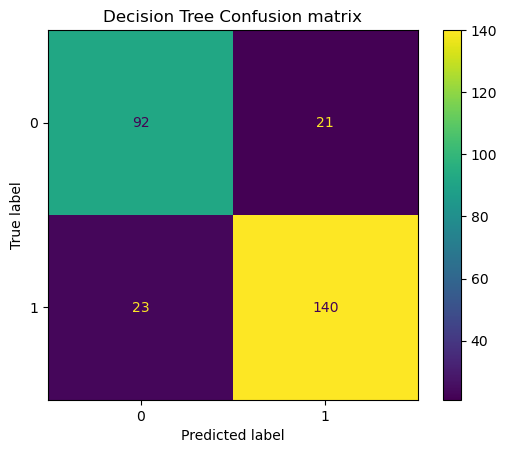

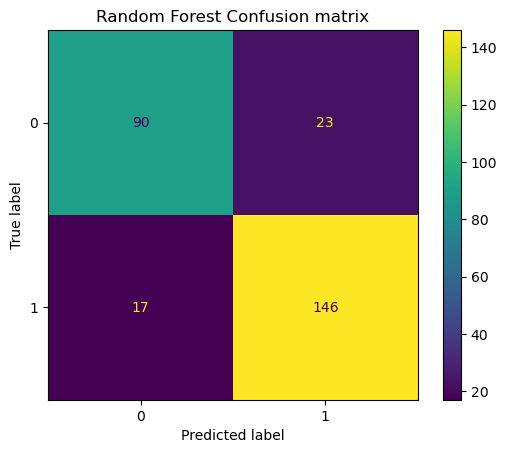

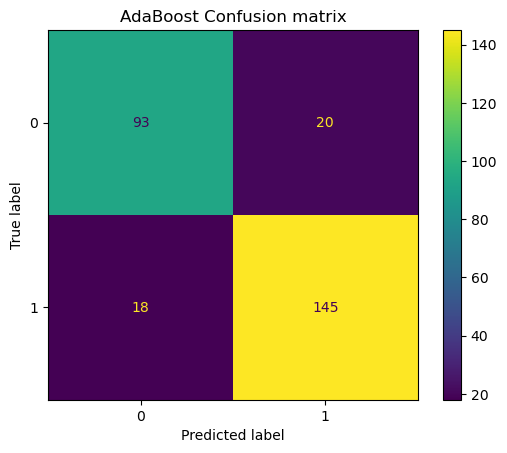

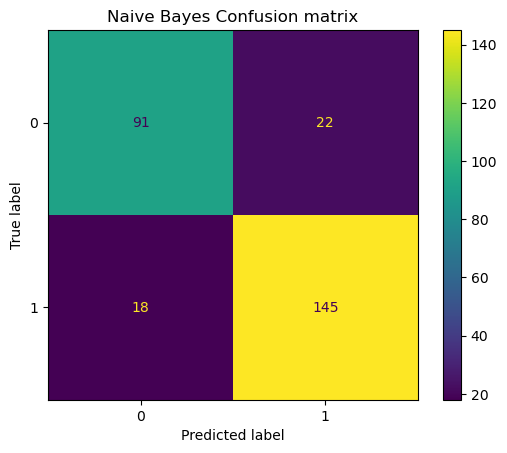

In [29]:
conf_matrix(y_test)

### _Deuxième itération_ : Selection  de features

####   **Methode 1 :**
   - Création de sous-ensembles: nouvelle colone pour taux_cholesterol infé à 0 <==>
     cholesterol_rate = 0 :: non measure , new_col <=> choles_rate measure = O for no & 1 for yes , 
        function apply to use 

In [30]:
 df_new = df.copy()

In [31]:
df_new['Cholesterol_measure'] =  (df_new[["Cholesterol"]].sum(axis=1) > 0).astype(int)

In [32]:
df_new.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,...,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_measure
0,40,M,ATA,140,289,0,...,172,N,0.0,Up,0,1
1,49,F,NAP,160,180,0,...,156,N,1.0,Flat,1,1
2,37,M,ATA,130,283,0,...,98,N,0.0,Up,0,1
3,48,F,ASY,138,214,0,...,108,Y,1.5,Flat,1,1
4,54,M,NAP,150,195,0,...,122,N,0.0,Up,0,1


In [33]:
y_op = df_new["HeartDisease"]
X_op = df_new.drop(["HeartDisease"],axis=1)

In [34]:
#séparation des données : données d'entrainement & données de test 
X_op_train,X_op_test,y_op_train,y_op_test = train_test_split(X_op, y_op, test_size=0.30, random_state=0)

In [35]:
X1_op_train = pd.concat([nums_values(X_op_train,X_op_train, StandardScaler()),
                      encode_cat_values(X_op_train, X_op_train, OneHotEncoder())],axis=1)

In [36]:
 X1_op_test = pd.concat([nums_values(X_op_train,X_op_test, StandardScaler()),
                        encode_cat_values(X_op_train, X_op_test, OneHotEncoder())],axis=1)

In [37]:
clas_ml(X1_op_train, y_op_train, X1_op_test, y_op_test)

C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted t

'DONE!!!'

In [38]:
eval_report(y_test)

 MODELS EVALUATION REPORT
........................


,Accuracy,Precision,Sensitivity_recall,Specificity,F1_score
Nearest Neighbors,0.847826,0.875776,0.865031,0.823009,0.870370
Linear SVM,0.858696,0.864706,0.901840,0.796460,0.882883
RBF SVM,0.699275,0.666667,0.981595,0.292035,0.794045
Gaussian Process,0.855072,0.863905,0.895706,0.796460,0.879518
Decision Tree,0.836957,0.868750,0.852761,0.814159,0.860681
Random Forest,0.862319,0.861272,0.914110,0.787611,0.886905
AdaBoost,0.862319,0.878788,0.889571,0.823009,0.884146
Naive Bayes,0.858696,0.873494,0.889571,0.814159,0.881459


 CONFUSION MATRIX BY MODEL
........................


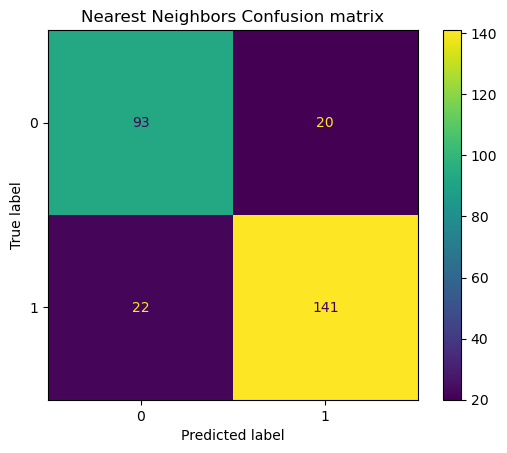

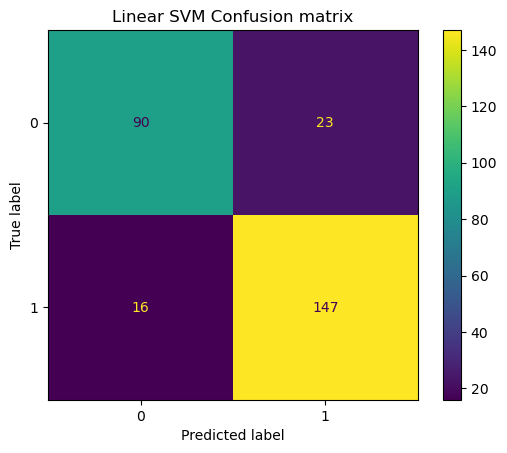

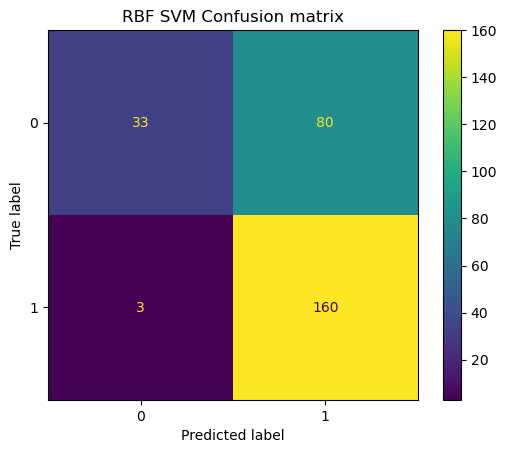

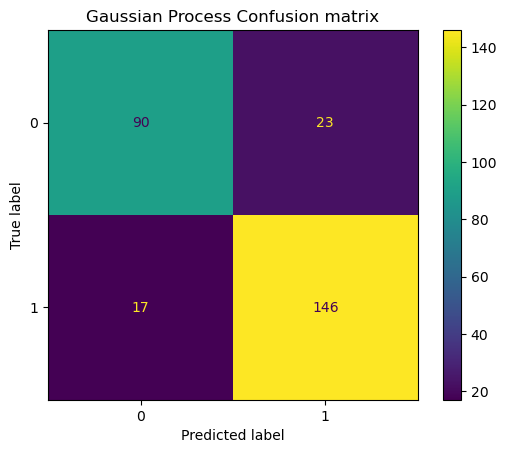

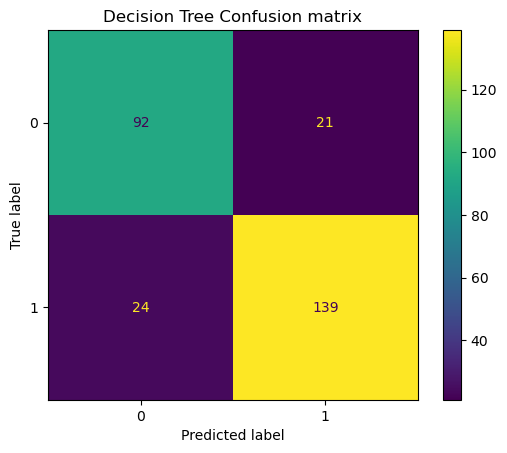

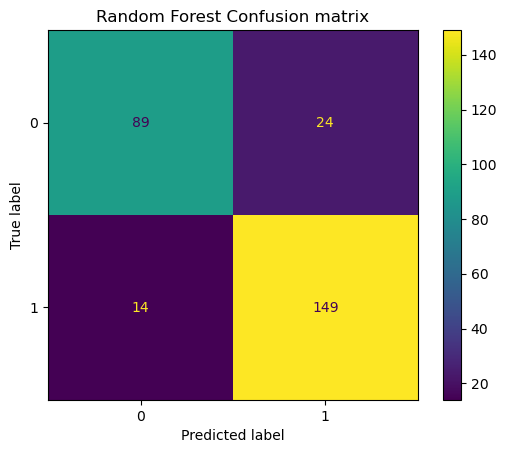

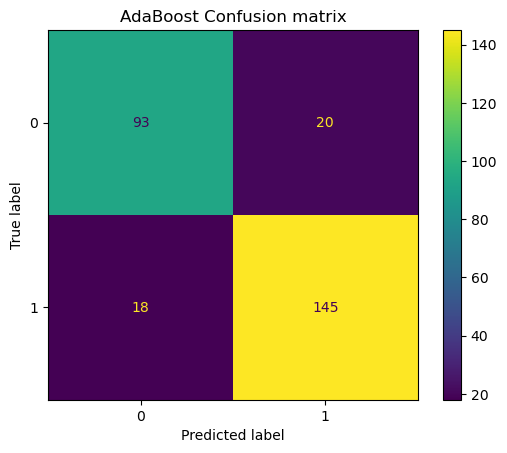

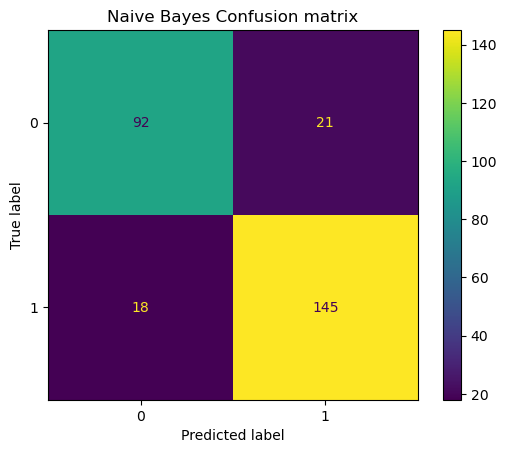

In [39]:
conf_matrix(y_test)

#### **Methode 2:** 
- Suppresion des colones : 
    - ExerciceAngina
    - FastingBS

In [40]:
#X_op.head(3)

In [41]:
X_op2 = X_op.drop(["ExerciseAngina", "FastingBS"],axis = 1)

In [42]:
#séparation des données : données d'entrainement & données de test 
X_op2_train,X_op2_test,y_op2_train,y_op2_test = train_test_split(X_op2, y_op, test_size=0.30, random_state=0)

In [43]:
X2_op_train = pd.concat([nums_values(X_op2_train,X_op2_train, StandardScaler()),
                      encode_cat_values(X_op_train, X_op_train, OneHotEncoder())],axis=1)
#***
X2_op_test = pd.concat([nums_values(X_op2_train,X_op2_test, StandardScaler()),
                        encode_cat_values(X_op_train, X_op_test, OneHotEncoder())],axis=1)

In [44]:
clas_ml(X2_op_train, y_op_train, X2_op_test, y_op_test)

C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted t

'DONE!!!'

In [45]:
eval_report(y_op_test)

 MODELS EVALUATION REPORT
........................


,Accuracy,Precision,Sensitivity_recall,Specificity,F1_score
Nearest Neighbors,0.873188,0.872093,0.920245,0.805310,0.895522
Linear SVM,0.847826,0.853801,0.895706,0.778761,0.874251
RBF SVM,0.717391,0.683983,0.969325,0.353982,0.802030
Gaussian Process,0.851449,0.854651,0.901840,0.778761,0.877612
Decision Tree,0.836957,0.868750,0.852761,0.814159,0.860681
Random Forest,0.862319,0.874251,0.895706,0.814159,0.884848
AdaBoost,0.833333,0.854545,0.865031,0.787611,0.859756
Naive Bayes,0.862319,0.874251,0.895706,0.814159,0.884848


 CONFUSION MATRIX BY MODEL
........................


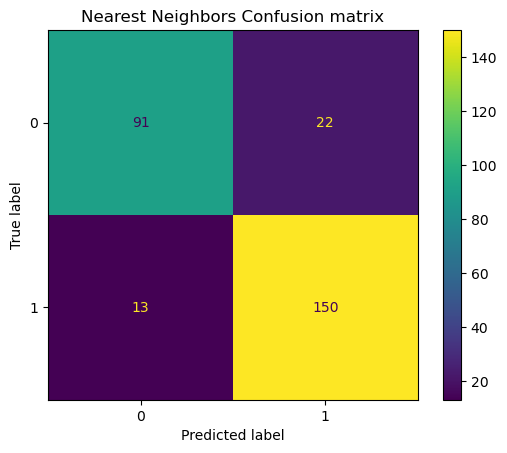

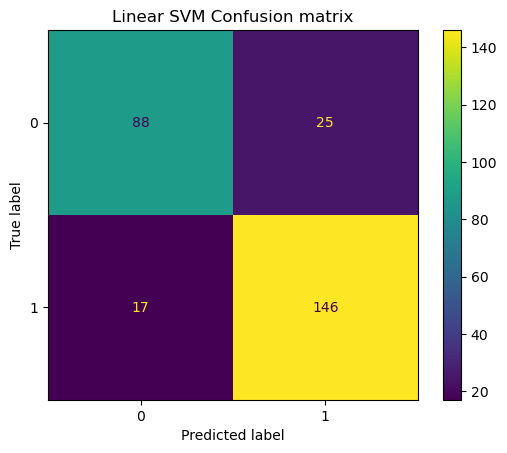

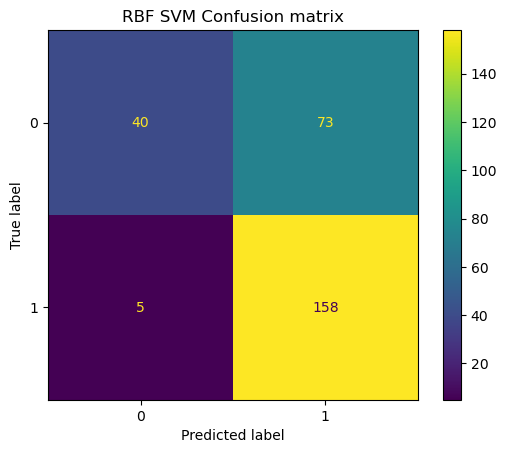

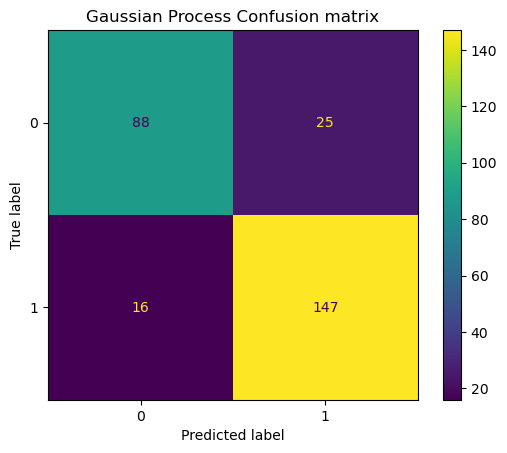

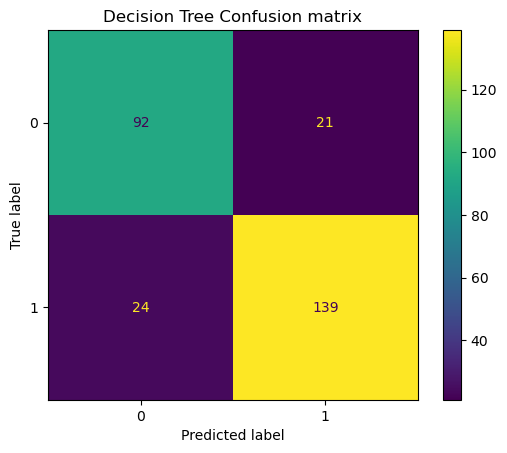

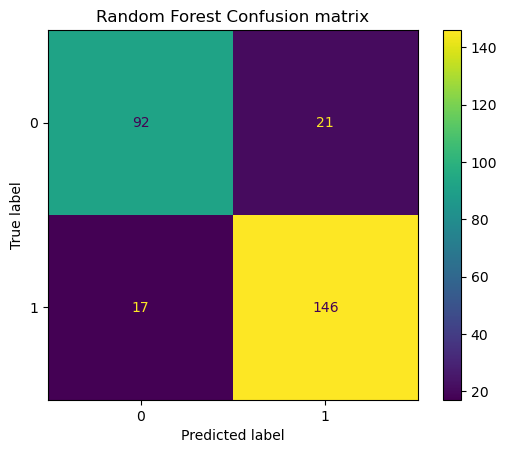

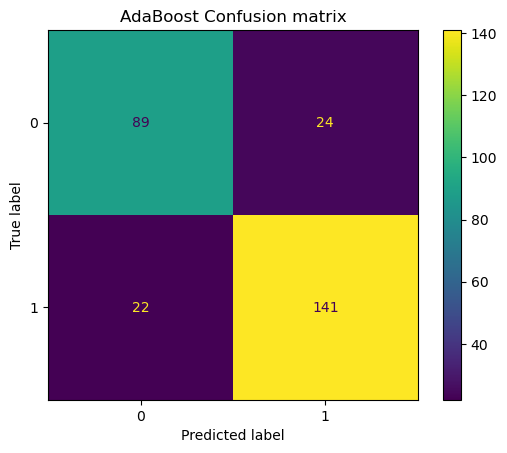

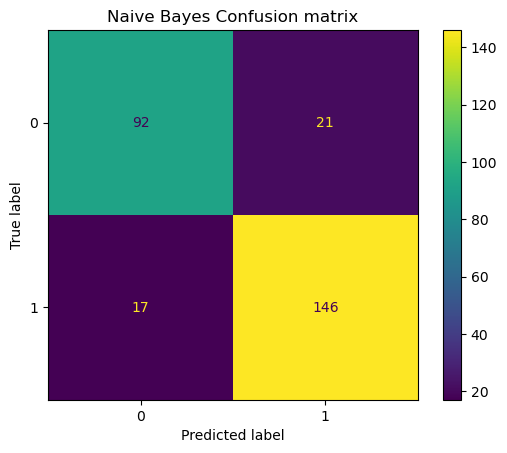

In [46]:
conf_matrix(y_op_test)

#### Methode 3 : Selection  de features

In [47]:
df2 = df.copy()

In [48]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


   - **Feature :ChesPainType**
   
   Le graphique de cette variable monter des outliers aussi, on va supprimer ces outliers.

In [49]:
df2["ChestPainType"].describe()

count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

In [50]:
outliers(df2,"ChestPainType")

KeyError: 'target'

In [ ]:
df2.groupby(["Sex"]).count()

In [ ]:
df2["ChestPainType"].value_counts()